# Isosteric enthalpy calculation

Isosteric enthalpy of adsorption gives an indication of the strength of the
adsorbate-material interaction and can be calculated through the
Clausius-Clapeyron method. In order to calculate $\Delta H_{ads}$, at least
two isotherms which were taken at slightly different temperatures are required.

First, make sure the data is imported.

In [1]:
# import isotherms
%run import.ipynb

# import the characterisation module
import pygaps.characterisation as pgc

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


Let's quickly plot the isotherms to see how they look. We put the temperature of
the experiment in the legend by using the `lgd_keys` keyword.

<AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

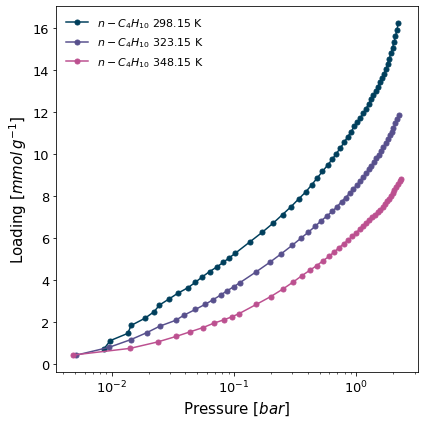

In [2]:
# import the graphing module
import pygaps.graphing as pgg

pgg.plot_iso(
    isotherms_isosteric,
    lgd_keys=['adsorbate', 'temperature'],
    logx=True,
)

The isotherms look good, except perhaps a bit of measurement error in the low pressure region.

The isosteric enthalpy calculation takes the list of the isotherms and returns
the results as a dictionary. Using the `verbose` keyword, we also generate a
graph that includes an error bar.

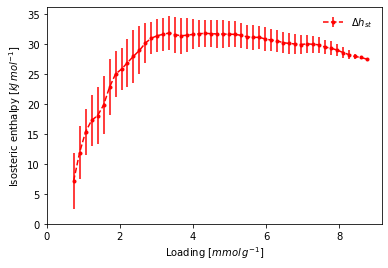

In [3]:
result_dict = pgc.isosteric_enthalpy(isotherms_isosteric, verbose=True)

The inaccuracy in the low pressure region has contributed to the odd enthalpy
curve. One other option would be to first fit a model to each isotherm, then
use it for the enthalpy determination.

Let's try a Double Site Langmuir model and then re-run the isosteric
calculation.

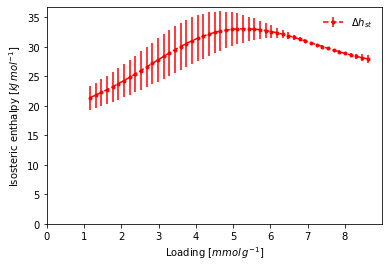

In [4]:
from pygaps.modelling import model_iso
models_isosteric = [
    model_iso(iso, model="dslangmuir")
    for iso in isotherms_isosteric
]
result_dict = pgc.isosteric_enthalpy(models_isosteric, verbose=True)

More information about the functions and their use can be found in the [manual](../manual/characterisation.rst).